# Construction de Psi

## Imports

### Librairies

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import os

### Autres fichiers

In [5]:
from affichageDonnees import displaySpectrogram, displaySound, displayPertinences, displayDiversities
from utils import getSound, getSoundAtPosition, getDateFromFilename, getFilenameAtPosition, getPositionOfFilename, getAllFilenames, playSound
from constructionPsi import getpsi, getPertinences, compute_descriptor, compute_pertinence, compute_diversity, get_all_diversity

## Construction

### Pertinence

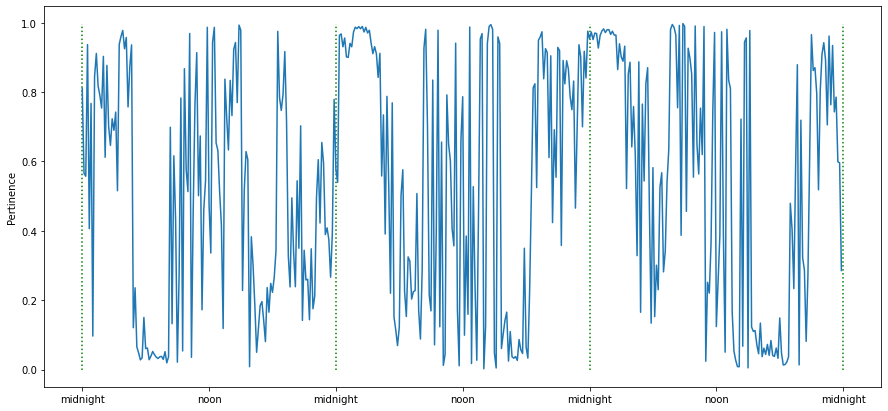

In [6]:
displayPertinences(pertinenceFunction = 'identity')

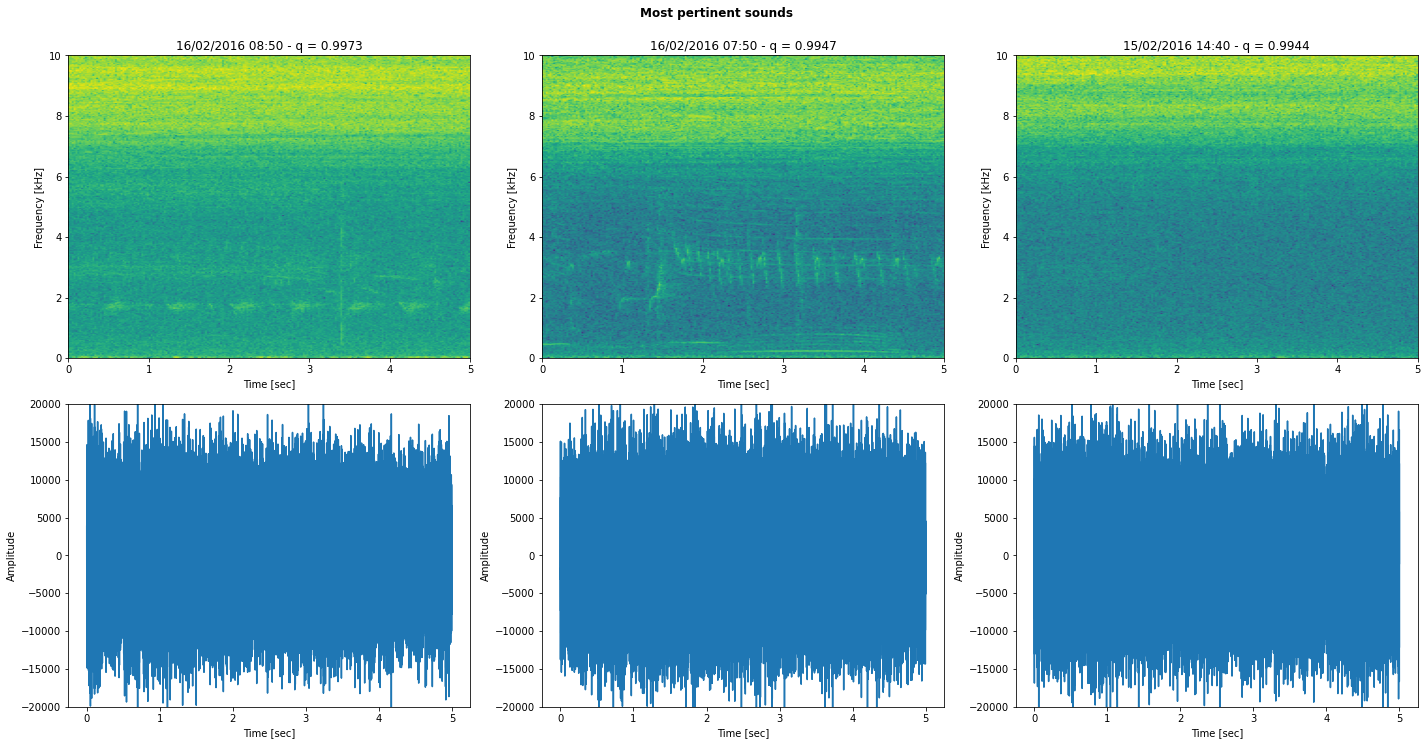

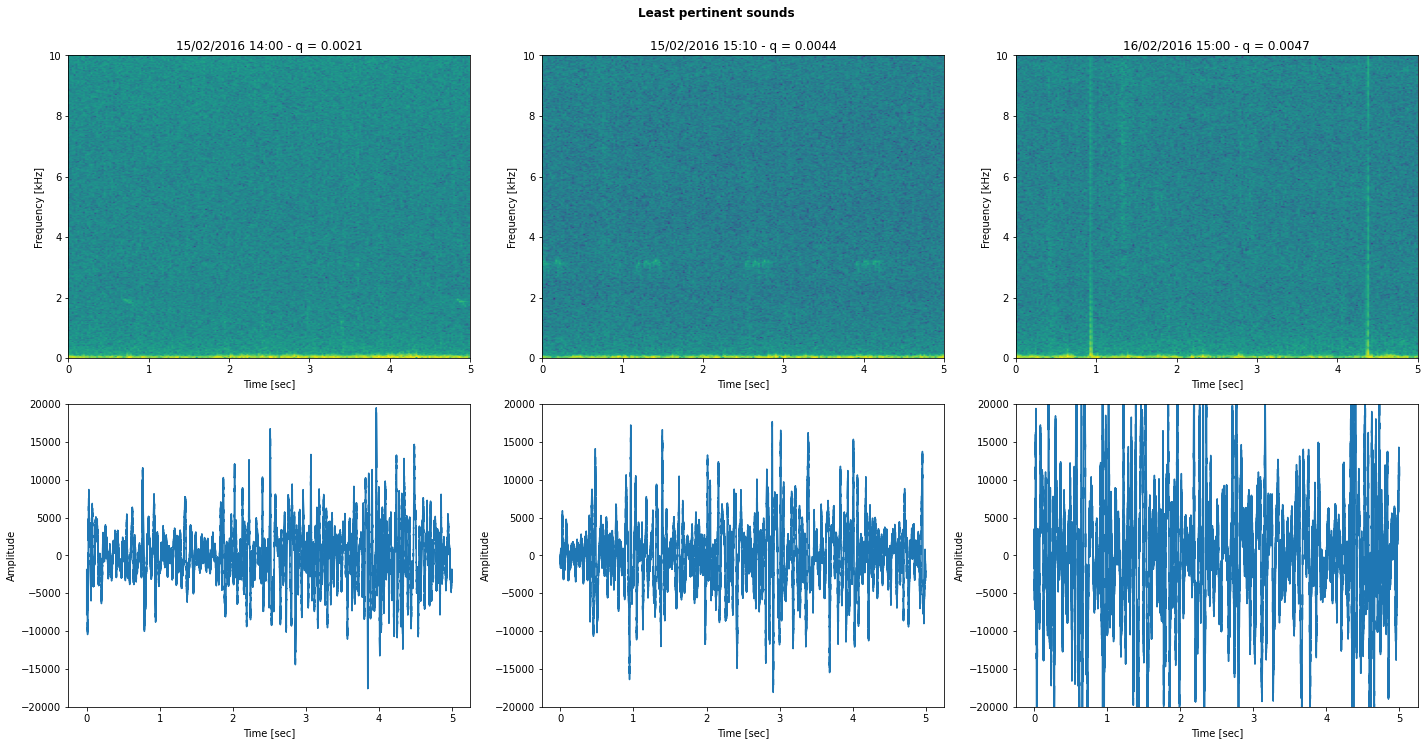

In [4]:
# Tri par pertinence

root = './SoundDatabase'

q = getPertinences(verbose = False)

sorted_index_q = np.argsort(q)

nbSounds = 432
pertinence_files = np.array(getAllFilenames(root))[sorted_index_q]
pertinence_scores = q[sorted_index_q]

nbTop = 3

fig, ax = plt.subplots(2, nbTop, figsize=(20, 10))
for k in range(nbTop):

    sound, fe = getSound(os.path.join(root, pertinence_files[nbSounds - k - 1]), 5)
    title = "{0} - q = {1:.4f}".format(getDateFromFilename(pertinence_files[nbSounds - k - 1]), pertinence_scores[nbSounds - k - 1])
    
    displaySpectrogram(sound, fe, title, ax[0, k])

    displaySound(sound, fe, 5, "", ax[1, k])

plt.suptitle("Most pertinent sounds", y = 1.03, fontweight = 'bold')
plt.show()

fig, ax = plt.subplots(2, nbTop, figsize=(20, 10))
for k in range(nbTop):
    sound, fe = getSound(os.path.join(root, pertinence_files[k]), 5)
    title = "{0} - q = {1:.4f}".format(getDateFromFilename(pertinence_files[k]), pertinence_scores[k])
    
    displaySpectrogram(sound, fe, title, ax[0, k])

    displaySound(sound, fe, 5, "", ax[1, k])

plt.suptitle("Least pertinent sounds", y = 1.03, fontweight = 'bold')
plt.show()

In [5]:
# Calcul de la diversité moyenne entre les signaux de pertinences maximales

root = './SoundDatabase'
nbSounds = 432
nbTop = 3
psi = getpsi(verbose = False, J = 12)

mean = 0
for i in range(nbTop):
    position1 = getPositionOfFilename(root, pertinence_files[nbSounds - i - 1])
    for j in range(i):
        position2 = getPositionOfFilename(root, pertinence_files[nbSounds - j - 1])
        mean += compute_diversity([position1, position2], psi, withPositions = True)
mean /= nbTop * (nbTop - 1) / 2

print(mean)

0.6259003275836942


### Descripteur

(69,)


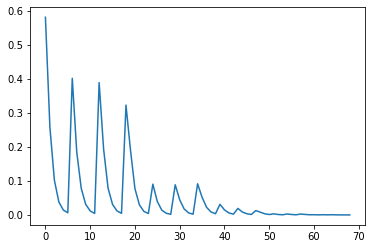

In [6]:
s, fe = getSound("./SoundDatabase/BRA2S3786_20160214_152000.wav", 5)
descriptorName = 'scalogramStat1'
J, Q = 8, 3

d = compute_descriptor(s, descriptorName, J, Q)

print(d.shape)
plt.plot(d)
plt.show()

### PSI

(432, 69)


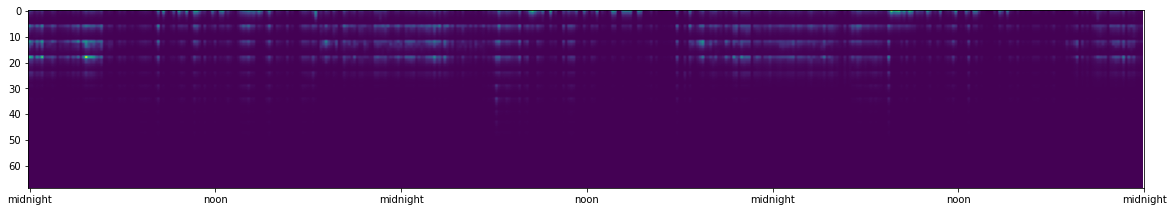

In [7]:
descriptorName = 'scalogramStat1'
J, Q = 8, 3
psi = getpsi(descriptorName = descriptorName, J = J, Q = 3, verbose = False)
print(psi.shape)

fig = plt.figure(figsize=(20, 10))
plt.imshow(psi.T)

dates = ['midnight', 'noon', 'midnight', 'noon', 'midnight', 'noon', 'midnight']
plt.xticks([nbSounds/6 * k for k in range(7)], dates)

plt.show()

## Mesure de diversité

Loading diversities from persisted file
Diversité minimale :  0.0
Diversité maximale :  0.9449921773982413


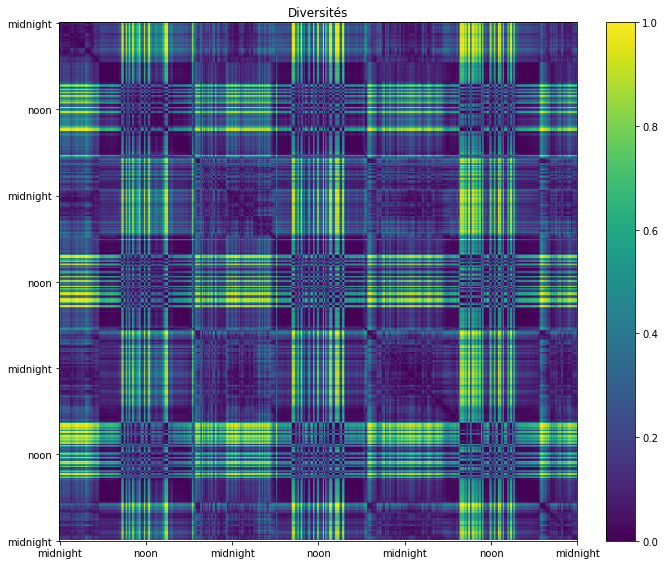

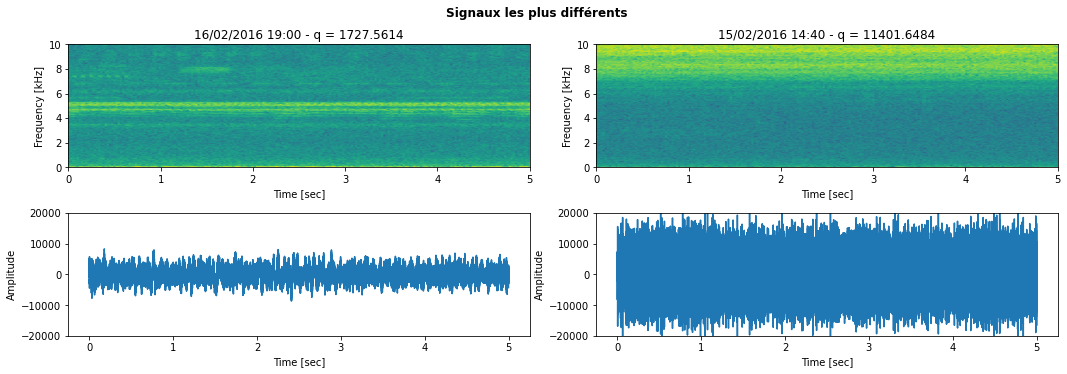

In [11]:
# Calcul de l'ensemble des diversités
descriptorName = 'scalogramStat1'
J, Q = 12, 3
diversities = get_all_diversity(verbose = True, descriptorName = descriptorName, J = J, Q = Q)

# Affichage de l'ensemble des diversités
nbSounds = 432
root = './SoundDatabase'

displayDiversities(descriptorName = descriptorName, J = J, Q = Q)


# diversité minimale et maximale
ind = np.unravel_index(np.argmin(diversities, axis = None), diversities.shape)
print("Diversité minimale : ", diversities[ind])
ind = np.unravel_index(np.argmax(diversities, axis = None), diversities.shape)
print("Diversité maximale : ", diversities[ind])

# Spectrogramme des 2 signaux les plus différents
fig, ax = plt.subplots(2, 2, figsize=(15, 5))

sound, fe = getSoundAtPosition(root, ind[0], 5)
title = "{0} - q = {1:.4f}".format(getDateFromFilename(getFilenameAtPosition(root, ind[0]), with_root=True, root=root), compute_pertinence(sound, fe))
displaySpectrogram(sound, fe, title, ax[0, 0])

displaySound(sound, fe, 5, "", ax[1, 0])

sound, fe = getSoundAtPosition(root, ind[1], 5)
title = "{0} - q = {1:.4f}".format(getDateFromFilename(getFilenameAtPosition(root, ind[1]), with_root=True, root=root), compute_pertinence(sound, fe))
displaySpectrogram(sound, fe, title, ax[0, 1])

displaySound(sound, fe, 5, "", ax[1, 1])

plt.suptitle("Signaux les plus différents", y = 1.03, fontweight = 'bold')
plt.show()


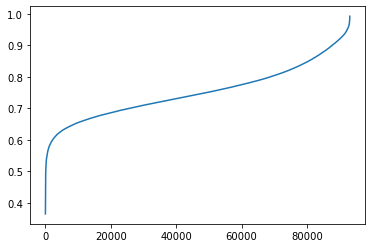

In [9]:
diversities_list = np.zeros(nbSounds * (nbSounds - 1) // 2)

k = 0
for i in range(nbSounds):
    for j in range(i):
        diversities_list[k] = diversities[i, j]
        k += 1

diversities_list.sort()

plt.plot(diversities_list)
plt.show()

### Affichage des eigenvalues

Nombres de valeurs propres nécessaires pour expliquer 99 % de la variance : 4


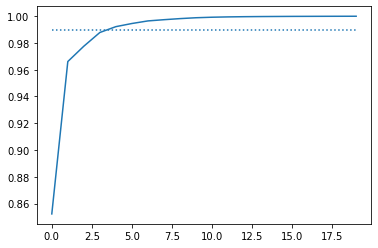

In [3]:
from affichageDonnees import displayEigenvalues

nbEigenvalues = 20
descriptorName = 'scalogramStat1'
J = 8
Q = 3
threshold = 0.99

displayEigenvalues(nbEigenvalues = nbEigenvalues, descriptorName = descriptorName, J = J, Q = Q, threshold = threshold)